In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DataFrame

In [125]:
  data = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [126]:
data.shape

(4340, 8)

In [127]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [128]:
data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [129]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Check the count of Categorical values in columns

In [130]:
print(data.value_counts('fuel'))
print("#################")
print()

print(data.value_counts('seller_type'))
print("#################")
print()

print(data.value_counts('transmission'))
print("#################")
print()

print(data.value_counts('owner'))

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
#################

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
#################

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
#################

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


Encoding the Categorical value

In [131]:
# Encoding Fuel
data.replace({'fuel':{'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3, 'Electric':4}} , inplace=True)

#Encoding seller type
data.replace({'seller_type':{'Individual':0, 'Dealer': 1, 'Trustmark Dealer':2}}, inplace=True)

#Encoding Transmission using [Map]

#if we don't do this we may get NaN values bcs it will only the exact categorical value, if it contain any white space it will give as NaN. So by using unique and strip() we remove the whiteSpace.

data['transmission'].unique()
data['transmission'] = data['transmission'].astype(str).str.strip()

Transmission_mapping ={'Manual':0,
                       'Automatic':1}
data['transmission'] = data['transmission'].map(Transmission_mapping)

#Encoding Owner using [map]

data['owner'].unique()
data['owner'] = data['owner'].astype(str).str.strip()

Owner_maping = {'Test Drive Car':0,
                'First Owner':1,
                'Second Owner':2,
                'Third Owner':3,
                'Fourth & Above Owner':4}
data['owner'] = data['owner'].map(Owner_maping)

/tmp/ipython-input-131-633631584.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'fuel':{'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3, 'Electric':4}} , inplace=True)
/tmp/ipython-input-131-633631584.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'seller_type':{'Individual':0, 'Dealer': 1, 'Trustmark Dealer':2}}, inplace=True)


In [132]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,1
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,2


In [133]:
data.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


Splitting data

In [134]:
X =  data[['year','km_driven','fuel','seller_type','transmission','owner']]

Y = data['selling_price']

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

Model Training

LINEAR REGRESSION

In [137]:
from sklearn.linear_model import LinearRegression

In [138]:
Lin_reg_model = LinearRegression()

In [139]:
Lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [140]:
train_Prediction = Lin_reg_model.predict(X_train)
test_Prediction = Lin_reg_model.predict(X_test)

<Axes: xlabel='selling_price'>

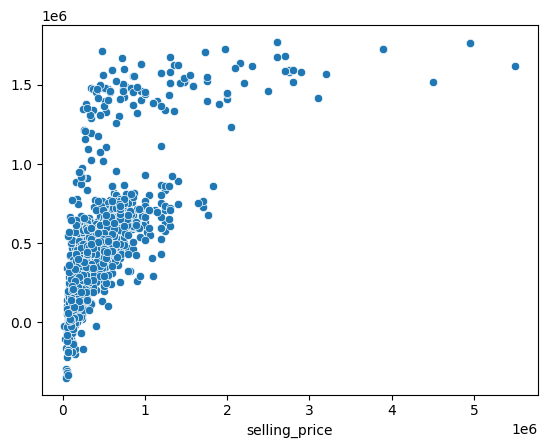

In [149]:
sns.scatterplot(x=y_test, y = test_Prediction)

In [141]:
from sklearn.metrics import r2_score

r2_score_train = r2_score(y_train,train_Prediction)
print(r2_score_train)


r2_score_test = r2_score(y_test,test_Prediction)
print(r2_score_test)

0.4300021411279402
0.47198498603322936


LASSO REGRESSION

In [142]:
from sklearn.linear_model import Lasso

In [143]:
Lasso_reg_model = Lasso()

In [144]:
Lasso_reg_model.fit(X_train, y_train)

Lasso()

In [145]:
train_Prediction = Lasso_reg_model.predict(X_train)
test_Prediction = Lasso_reg_model.predict(X_test)

<Axes: xlabel='selling_price'>

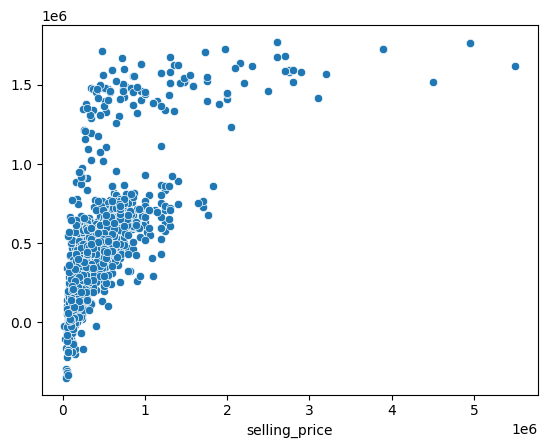

In [150]:
sns.scatterplot(x=y_test, y = test_Prediction)

In [154]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r2_score_train = r2_score(y_train,train_Prediction)
print(r2_score_train)


r2_score_test = r2_score(y_test,test_Prediction)
print("R2 score for Lasso: ",r2_score_test)



0.43000214107785295
R2 score for Lasso:  0.47198608299450917


In [151]:
print("Linear Coefficients:", Lin_reg_model.coef_)
print("Lasso Coefficients:", Lasso_reg_model.coef_)

Linear Coefficients: [ 3.88260997e+04 -6.05076607e-01  2.14559539e+05  9.77823312e+04
  9.11292866e+05 -2.12512215e+04]
Lasso Coefficients: [ 3.88264051e+04 -6.05076717e-01  2.14556155e+05  9.77798388e+04
  9.11282649e+05 -2.12490570e+04]


Conclusion

In [152]:
print("THE R2 SCORE IS LESS FOR BOTH MODEL. IT's 0.4, SO IT IS WEAK MODEL")

THE R2 SCORE IS LESS FOR BOTH MODEL. IT's 0.4, SO IT IS WEAK MODEL
